In [35]:
import os
import pandas as pd
from typing import Type
from math import sqrt
import matplotlib.pyplot as plt
import seaborn as sns

In [63]:
#Obtener archivos de data. Esto lo hace independiente del sistema operativo
files={}
for p in os.listdir('data'):
    files[p] = os.path.abspath(os.path.join("data",p))


---

In [3]:
#Funciones propias
class Point():
    def __init__(self, x:float, y:float):
        self.x = x
        self.y = y
    def square_diff(self):
        return pow(self.x-self.y, 2)

    @staticmethod
    def calculate_point_distance(pointA: 'Point',pointB: 'Point'):
        return sqrt(pointA.square_diff() + pointB.square_diff())
    
def calculate_distance(x,y):
    #para la tabla que ya tiene calculada la referencia
    return sqrt(pow(x,2)+pow(y,2))


---

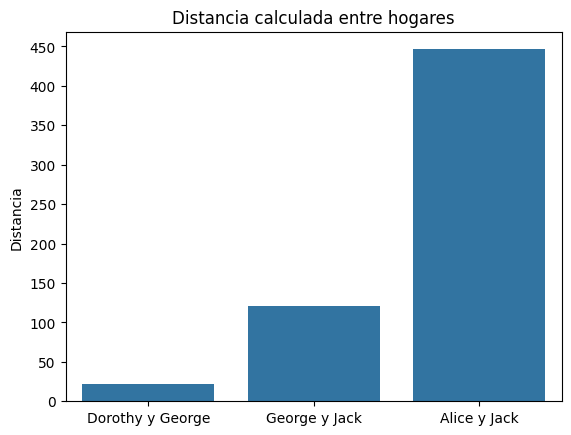

In [61]:
#La , se usa como decimal en este caso
personasDistancia = files.get('PersonasPorDistanciaAlPozo.xlsx')
hogaresPersonas = pd.read_excel(personasDistancia).set_index('Nombre')
hogaresPersonas['Puntos'] = hogaresPersonas.apply(lambda row: Point(row['X'],row['Y']), axis=1)

#Distancias
dorothy_george = Point.calculate_point_distance(hogaresPersonas.loc['Dorothy','Puntos'],
                                                hogaresPersonas.loc['George','Puntos'])

george_jack = Point.calculate_point_distance(hogaresPersonas.loc['George','Puntos'],
                                             hogaresPersonas.loc['Jack','Puntos'])

alice_jack = Point.calculate_point_distance(hogaresPersonas.loc['Alice','Puntos'],
                                            hogaresPersonas.loc['Jack','Puntos'])
pairs= {
    name: val for name, val in zip(["Dorothy y George", "George y Jack", "Alice y Jack"],[dorothy_george, george_jack, alice_jack])
}

sns.barplot(pairs)
plt.title("Distancia calculada entre hogares")

plt.ylabel("Distancia")
plt.yticks([i for i in range(0,500,50)])
plt.show()

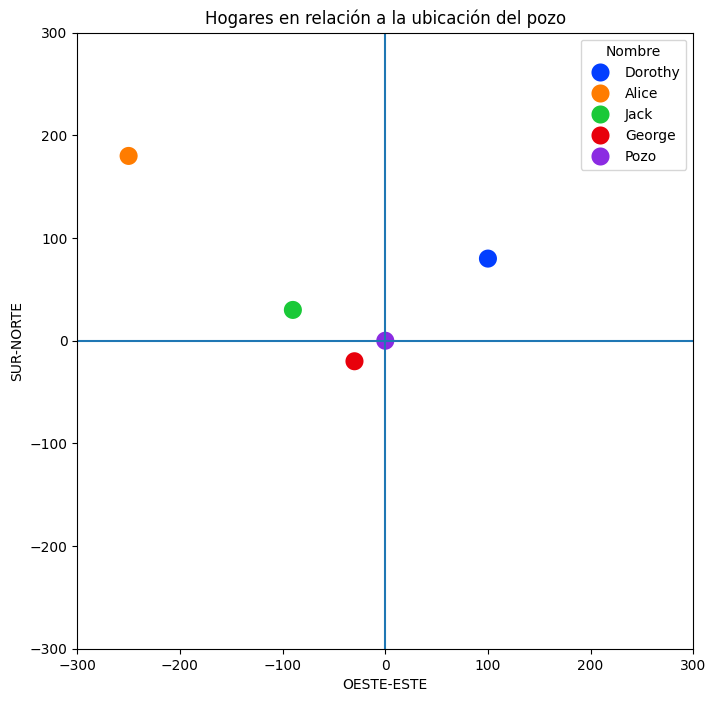

In [74]:
fig, ax = plt.subplots(figsize=(12,8))
xmin,ymin = (-300,-300,)
xmax,ymax = (300, 300,)
ax.set_title("Hogares en relación a la ubicación del pozo")
ax.set(xlim=(xmin, xmax), ylim=(ymin, ymax), aspect='equal')
plt.axvline()
plt.axhline()
sns.scatterplot(data=hogaresPersonas, x=hogaresPersonas['X'],y=hogaresPersonas['Y'],hue=hogaresPersonas.index, s=200,palette="bright")
plt.ylabel("SUR-NORTE")
plt.xlabel("OESTE-ESTE")
plt.show()

---

In [80]:
#La , se usa como decimal en este caso
muertesPorComp = files.get('MuertesPorHogarPorCompaniaDeAgua.xlsx')
muertesTablaTotal = pd.read_excel(muertesPorComp, decimal=',').set_index('Compañia de agua')
muertesTabla = muertesTablaTotal.drop('Total')
muertesTabla

,Hogares,Muertes por cólera,Muertes por 10000 hogares,Porcentaje sobre total
Compañia de agua,,,,
S-V,40046,1263,315,0.453827
L,26107,98,37,0.035214
Londres (Resto),256423,1422,55,0.510959


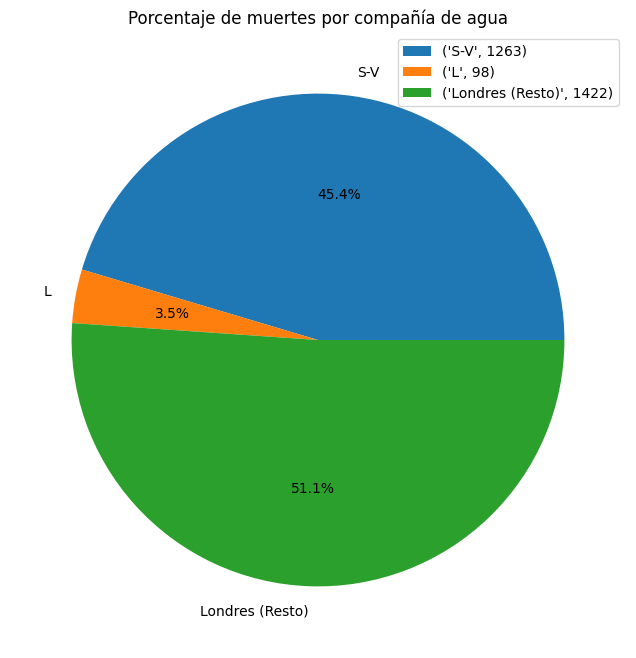

In [123]:
fig,ax=plt.subplots(figsize=(12,8))
pie=plt.pie(muertesTabla['Porcentaje sobre total'],labels=muertesTabla.index, autopct='%1.1f%%')
plt.title('Porcentaje de muertes por compañía de agua')
plt.legend(muertesTabla['Muertes por cólera'].to_dict().items(),loc='upper right')
plt.show()

---

In [5]:
distancia_al_pozo = files.get('Tabla de distancias de los hogares al pozo de agua en Broad street - Tabla.csv')
#La , se usa como decimal en este caso
tabla = pd.read_csv(distancia_al_pozo,decimal=',')
#Calcular distancia dados x e y
tabla['Distancia al pozo de agua de la calle Broad'] = tabla.apply(
    lambda row:
    calculate_distance(row['Coordenada x respecto del centro de referencia'],row['Coordenada y respecto del centro de referencia']),
    axis=1
)
tabla

,Numeración de las personas fallecidas,Hogar donde vivía la persona fallecida,Coordenada x respecto del centro de referencia,Coordenada y respecto del centro de referencia,Distancia al pozo de agua de la calle Broad
0,1,1,5.257523,7.497999,9.157594
1,2,1,5.257523,7.497999,9.157594
2,3,2,2.981522,7.457001,8.030961
3,4,2,2.981522,7.457001,8.030961
4,5,3,1.313402,7.418131,7.533504
...,...,...,...,...,...
145,146,66,-3.334478,5.792999,6.684129
146,147,66,-3.334478,5.792999,6.684129
147,148,67,-4.294839,5.486439,6.967543
148,149,67,-4.294839,5.486439,6.967543


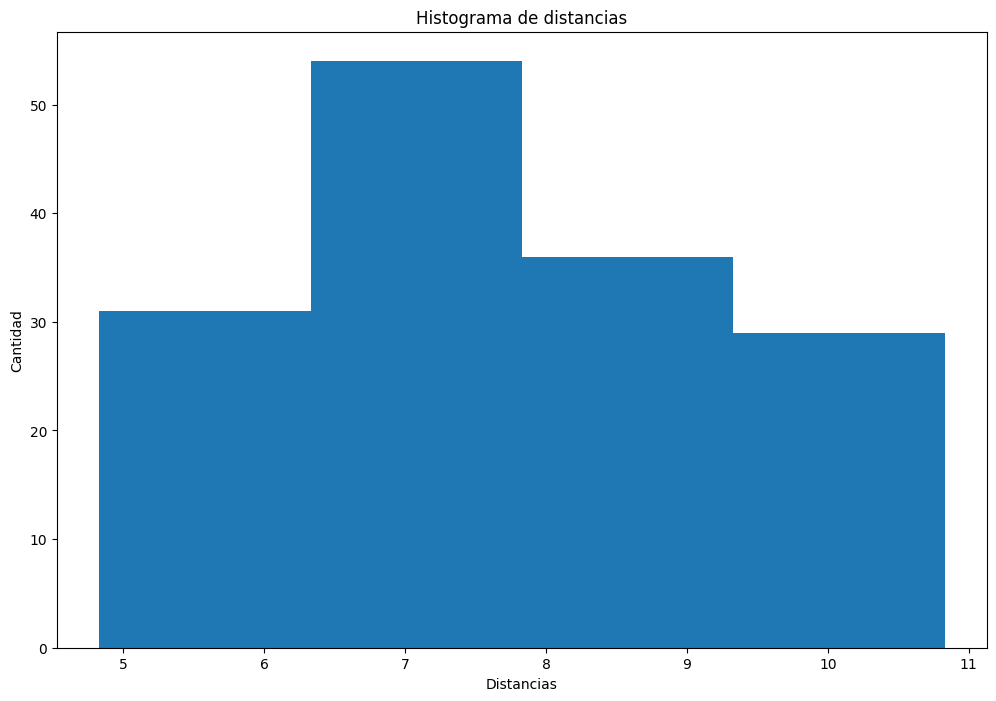

In [6]:
fig,ax=plt.subplots(figsize=(12,8))
plt.hist(tabla['Distancia al pozo de agua de la calle Broad'], bins=4)
ax.set_title("Histograma de distancias")
plt.ylabel("Cantidad")
plt.xlabel("Distancias")
plt.show()

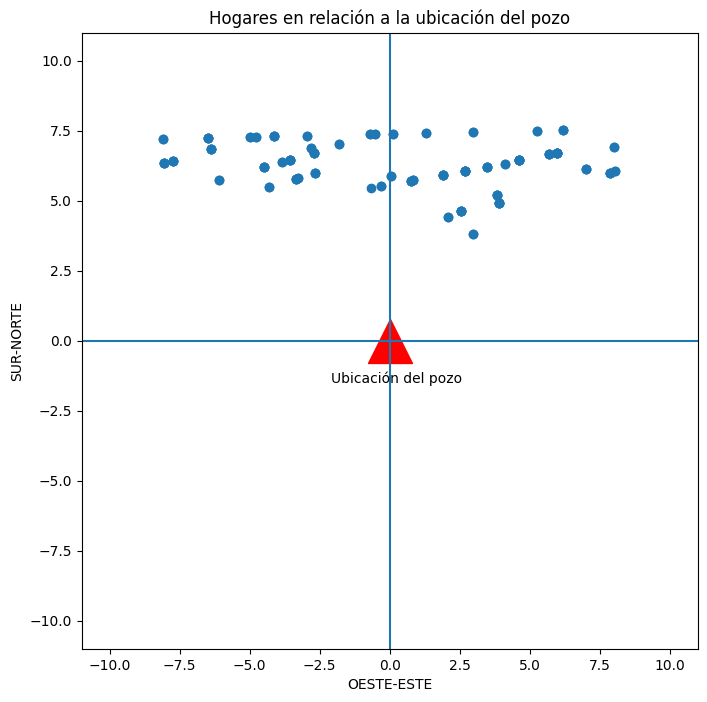

In [7]:
fig, ax = plt.subplots(figsize=(12,8))
xmin,ymin = (-10,-10,)
xmax,ymax = (10, 10,)
ax.set_title("Hogares en relación a la ubicación del pozo")
ax.set(xlim=(xmin-1, xmax+1), ylim=(ymin-1, ymax+1), aspect='equal')
plt.axvline()
plt.axhline()
plt.scatter(tabla['Coordenada x respecto del centro de referencia'],tabla['Coordenada y respecto del centro de referencia'])
plt.ylabel("SUR-NORTE")
plt.xlabel("OESTE-ESTE")
plt.scatter([0],[0],[1000], c="red", marker="^")
plt.annotate("Ubicación del pozo",[0,0], xytext=[-2.1,-1.5])
plt.show()